In [12]:
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy import stats


In [13]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [14]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.343200e+05,834320.000000,834320.000000,834320.000000,834320.000000,834320.000000,834320.000000,834310.000000,290925.000000,834310.000000,61325.000000,2071.000000,61.000000,834320.000000,834320.000000
mean,2.163756e+08,1335.953179,10.708680,1117.292147,1.413470,500.844621,29.782026,305.839397,363.065742,500.582878,957.498997,983.795751,990.868852,33.981070,-118.032961
std,1.090810e+07,653.964917,6.094713,609.462937,0.492456,207.778540,21.782950,216.806584,123.716983,207.565871,111.393187,52.531254,27.690236,1.775627,6.156465
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102104e+08,900.000000,6.000000,615.000000,1.000000,331.000000,6.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.013700,-118.429500
50%,2.201268e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321400
75%,2.220196e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [15]:
df.shape

(834320, 28)

In [16]:
df_uptaded = df.drop(['DR_NO','AREA','Crm Cd 1','Crm Cd', 'Part 1-2','Status',
       'Crm Cd 2', 'Crm Cd 3','Cross Street','Weapon Used Cd', 'Mocodes', 'Crm Cd 4','Rpt Dist No','Date Rptd','Status Desc','Premis Cd'], axis=1)
df_uptaded

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...
834315,01/26/2023 12:00:00 AM,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,12500 BRANFORD ST,34.2466,-118.4054
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116
834317,04/12/2023 12:00:00 AM,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,6100 S VERMONT AV,33.9841,-118.2915
834318,07/01/2023 12:00:00 AM,1,Central,PICKPOCKET,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,500 S MAIN ST,34.0467,-118.2485


In [17]:
#Rename the columns
df_uptaded = df_uptaded.rename(columns={
    "DATE OCC": "Date of Crime",
    "DATE RPTD": "Date Reported",
    "TIME OCC": "Time of Crime",
    "AREA NAME": "Neighborhood",
    "Crm Cd Desc": "Type of Crime",
    "Vict Age": "Age",
    "Vict Sex": "Gender",
    "Vict Descent": "Ethnicity",
    "Premis Desc": "Location",
    "Weapon Desc": "Weapon Used",
    "LOCATION": "Address",
    "LAT": "Latitude",
    "LON": "Longitude"
})

In [18]:
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('H', 'Hispanic')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('B', 'Black')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('W', 'White')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('O', 'Others')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('A', 'Other Asian')

In [19]:
df_nonan = df_uptaded[df_uptaded['Weapon Used'].notna()]
df_nonan

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,01/01/2020 12:00:00 AM,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,01/04/2020 12:00:00 AM,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,01/05/2020 12:00:00 AM,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,08/27/2023 12:00:00 AM,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,07/24/2023 12:00:00 AM,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,09/20/2023 12:00:00 AM,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [20]:
df_nonan.loc[:, 'Ethnicity'] = df_nonan['Ethnicity'].replace('H', 'Hispanic')
df_nonan.loc[:, 'Ethnicity'] = df_nonan['Ethnicity'].replace('B', 'Black')
df_nonan.loc[:, 'Ethnicity'] = df_nonan['Ethnicity'].replace('W', 'White')
df_nonan.loc[:, 'Ethnicity'] = df_nonan['Ethnicity'].replace('O', 'Others')
df_nonan.loc[:, 'Ethnicity'] = df_nonan['Ethnicity'].replace('A', 'Other Asian')


In [21]:
df_nonan = df_uptaded[df_uptaded['Weapon Used'].notna()]
df_nonan

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,01/01/2020 12:00:00 AM,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,01/04/2020 12:00:00 AM,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,01/05/2020 12:00:00 AM,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,08/27/2023 12:00:00 AM,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,07/24/2023 12:00:00 AM,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,09/20/2023 12:00:00 AM,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [22]:
df_nonan['Date of Crime'] = pd.to_datetime(df_nonan['Date of Crime'], format='%m/%d/%Y %I:%M:%S %p')
df_nonan['Month'] = df_nonan['Date of Crime'].dt.strftime('%B')
last_column = df_nonan.pop('Month') 
df_nonan.insert(1, 'Month', last_column)
df_nonan

C:\Users\komis\AppData\Local\Temp\ipykernel_5916\419088731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Date of Crime'] = pd.to_datetime(df_nonan['Date of Crime'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\komis\AppData\Local\Temp\ipykernel_5916\419088731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Month'] = df_nonan['Date of Crime'].dt.strftime('%B')


,Date of Crime,Month,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,2020-01-08,January,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,January,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,2020-01-01,January,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,2020-01-04,January,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,2020-01-05,January,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,August,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,2023-07-24,July,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,2023-09-20,September,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,2023-03-22,March,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [23]:
from datetime import datetime


df_nonan['Time of Crime'] = pd.to_datetime(df_nonan['Time of Crime'], format='%H%M', errors='coerce').dt.time


df_nonan

C:\Users\komis\AppData\Local\Temp\ipykernel_5916\898085979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Time of Crime'] = pd.to_datetime(df_nonan['Time of Crime'], format='%H%M', errors='coerce').dt.time


,Date of Crime,Month,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,2020-01-08,January,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,January,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,2020-01-01,January,03:00:00,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,2020-01-04,January,22:00:00,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,2020-01-05,January,09:55:00,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,August,03:00:00,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,2023-07-24,July,14:00:00,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,2023-09-20,September,19:15:00,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,2023-03-22,March,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [24]:
df_nonan['Hour'] = [time.hour for time in df_nonan['Time of Crime']]
df_nonan

C:\Users\komis\AppData\Local\Temp\ipykernel_5916\2590501906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Hour'] = [time.hour for time in df_nonan['Time of Crime']]


,Date of Crime,Month,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude,Hour
0,2020-01-08,January,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978,22.0
1,2020-01-01,January,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545,3.0
5,2020-01-01,January,03:00:00,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534,3.0
10,2020-01-04,January,22:00:00,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648,22.0
11,2020-01-05,January,09:55:00,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,August,03:00:00,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705,3.0
834306,2023-07-24,July,14:00:00,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151,14.0
834309,2023-09-20,September,19:15:00,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465,19.0
834316,2023-03-22,March,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116,10.0


<Axes: title={'center': 'Number of Crimes per Hour'}, xlabel='Hour', ylabel='Number of Crimes'>

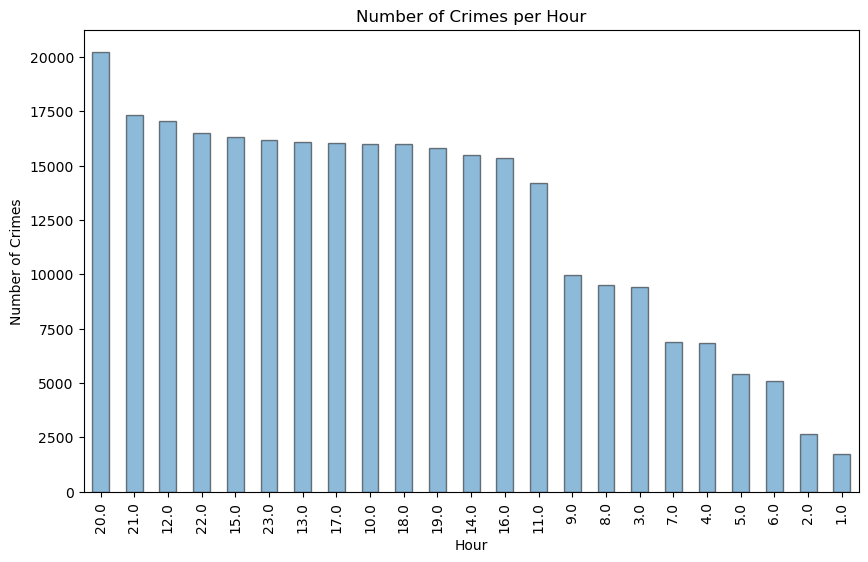

In [25]:
df_nonan['Hour'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10, 6),edgecolor = 'black', ylabel='Number of Crimes', title='Number of Crimes per Hour')

<Axes: title={'center': 'Number of Crimes per Month'}, xlabel='Month', ylabel='Number of Crimes'>

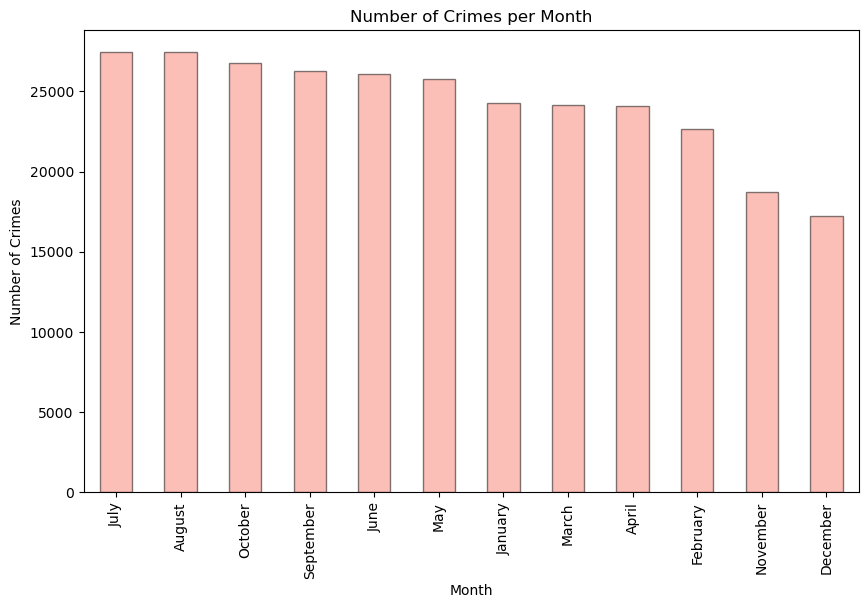

In [26]:
df_nonan['Month'].value_counts().plot(kind='bar', color='salmon', ylabel='Number of Crimes', title='Number of Crimes per Month', alpha=0.5, figsize=(10, 6), edgecolor = 'black')

In [27]:
filtered_df = df_nonan[df_nonan.groupby('Type of Crime')['Type of Crime'].transform('count') > 100]
filtered_df['Type of Crime'].value_counts()

Type of Crime
BATTERY - SIMPLE ASSAULT                                    66563
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47944
INTIMATE PARTNER - SIMPLE ASSAULT                           41896
ROBBERY                                                     28597
CRIMINAL THREATS - NO WEAPON DISPLAYED                      17234
BRANDISH WEAPON                                             13001
INTIMATE PARTNER - AGGRAVATED ASSAULT                       11363
BURGLARY                                                     6530
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      5335
ATTEMPTED ROBBERY                                            4350
OTHER ASSAULT                                                3853
BATTERY WITH SEXUAL CONTACT                                  3700
RAPE, FORCIBLE                                               3321
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                      3113
BURGLARY FROM VEHICLE                                        2

In [28]:
df_nonan.columns

Index(['Date of Crime', 'Month', 'Time of Crime', 'Neighborhood',
       'Type of Crime', 'Age', 'Gender', 'Ethnicity', 'Location',
       'Weapon Used', 'Address', 'Latitude', 'Longitude', 'Hour'],
      dtype='object')

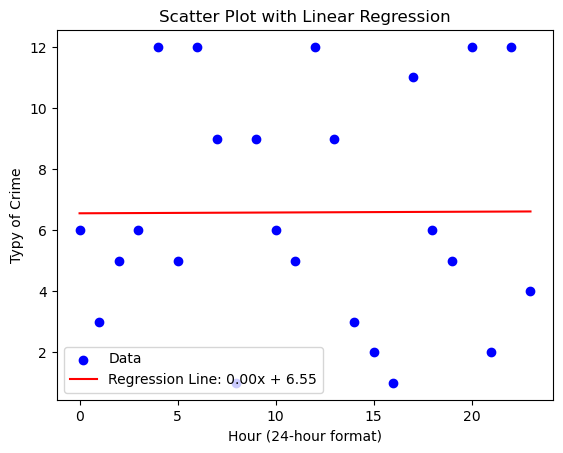

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Assuming N is defined somewhere in your code
N = 1000

# Assuming filtered_df is a DataFrame with 'Hour' and 'Month' columns
# Replace this with your actual DataFrame if needed

# Generate some sample data
filtered_df = {'Hour': range(24), 'Type of Crime': [random.randint(1, 12) for _ in range(24)]}

# Extract x and y data
x = filtered_df['Hour']
y = filtered_df['Type of Crime']

# Perform linear regression using numpy
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)

# Create a scatter plot
plt.scatter(x, y, label='Data', marker='o', color='blue') 

# Plot the regression line
plt.plot(x, poly(x), color='red', label=f'Regression Line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Set labels and title
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Typy of Crime')
plt.title('Scatter Plot with Linear Regression')

# Show legend
plt.legend()

# Show the plot
plt.show()
